# Plots for FAT* paper

In [1]:
import pandas as pd
import glob
import yaml
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


with open('config_file.yaml', 'r') as f:
    config = yaml.load(f)
# read all datasetsprint(config)


In [2]:
# read all datasets

dataset_name = 'adult'
adult_df = pd.concat(map(pd.read_csv, glob.glob(config['ROOT_PATH'] + '/results/population/' + dataset_name + '/old/' +  "*.csv")))

dataset_name = 'german'
german_df = pd.concat(map(pd.read_csv, glob.glob(config['ROOT_PATH'] + '/results/population/' + dataset_name + '/old/' +  "*.csv")))

dataset_name = 'propublica_recidivism'
propublica_df = pd.concat(map(pd.read_csv, glob.glob(config['ROOT_PATH'] + '/results/population/' + dataset_name + '/old/' +  "*.csv")))

dataset_name = 'propublica_violent_recidivism'
propublica_violent_df = pd.concat(map(pd.read_csv, glob.glob(config['ROOT_PATH'] + '/results/population/' + dataset_name + '/old/' +  "*.csv")))

dataset_name = 'ricci'
ricci_df = pd.concat(map(pd.read_csv, glob.glob(config['ROOT_PATH'] + '/results/population/' + dataset_name + '/old/' +  "*.csv")))


In [3]:
adult_df.head()

,id,generation,rank,creation_mode,error,dem_fp,criterion,max_depth,min_samples_split,max_leaf_nodes,class_weight,actual_depth,actual_leaves
0,6PT5PAPLPT,1,4,inicialization,0.262792,0.021429,0.0,NaN,2,NaN,NaN,38,2725
1,3QDBY4WVRK,1,7,inicialization,0.262174,0.039590,1.0,38.0,2,2725.0,NaN,38,2603
2,U99RWU3RGG,1,0,inicialization,0.269242,0.007963,1.0,10.0,28,502.0,5.0,10,173
3,UZWL1U37F4,1,2,inicialization,0.191907,0.049685,0.0,23.0,14,676.0,8.0,23,676
4,4POP99OZB8,1,1,inicialization,0.244489,0.019390,0.0,30.0,9,2446.0,5.0,30,1650


## quantils analysis

In [4]:
ricci_df[['error', 'dem_fp', 'actual_depth', 'actual_leaves']].describe()

,error,dem_fp,actual_depth,actual_leaves
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.061252,0.011473,3.477310,5.328920
std,0.068515,0.046114,0.682107,1.049858
min,0.000000,0.000000,1.000000,2.000000
25%,0.000000,0.000000,3.000000,5.000000
50%,0.051317,0.000000,3.000000,5.000000
75%,0.105573,0.000000,4.000000,6.000000
max,1.000000,1.000000,7.000000,12.000000


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


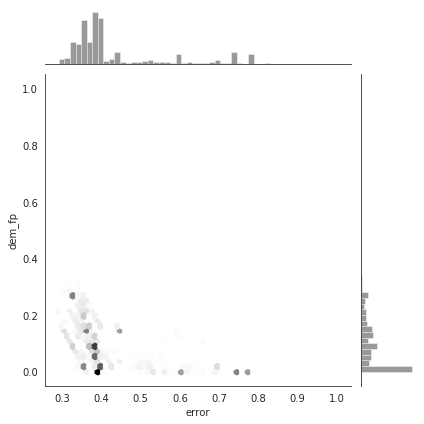

In [5]:
with sns.axes_style("white"):
    sns.jointplot(x=propublica_violent_df.error, y=propublica_violent_df.dem_fp, kind="hex", color="k");

## Pareto frontier

In [6]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] <= scores[i]) and any(scores[j] < scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

/home/avaldivia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,error,dem_fp,actual_depth,actual_leaves
count,68.000000,68.000000,68.000000,68.000000
mean,0.233023,0.023764,9.500000,221.808824
std,0.065754,0.028210,3.312122,242.732901
min,0.169521,0.000000,4.000000,13.000000
25%,0.174184,0.000614,7.000000,64.000000
50%,0.236325,0.007553,9.000000,134.500000
75%,0.277091,0.044003,11.000000,222.250000
max,0.572963,0.088944,18.000000,893.000000


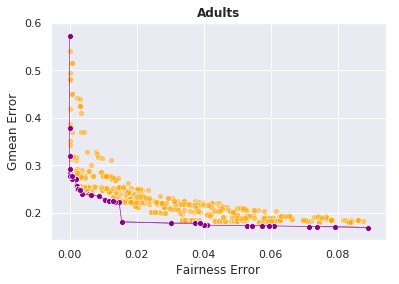

In [19]:
adult_df_last_generation = adult_df.loc[adult_df['generation'] == 200]
adult_df_last_generation = adult_df_last_generation.reset_index()
rows_pareto = identify_pareto(adult_df_last_generation[['error', 'dem_fp']].as_matrix())

adult_pareto_frontier = adult_df_last_generation.iloc[rows_pareto]
adult_pareto_others = adult_df_last_generation[~adult_df_last_generation.index.isin(rows_pareto)]

sns.set()
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_others, color="orange", alpha = 0.5)
ax = sns.lineplot(x="dem_fp", y="error", markers=True, data=adult_pareto_frontier, lw=0.6, color="darkmagenta")
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_frontier, color="darkmagenta")
ax.set_title('Adults', fontweight='bold')
ax.set_xlabel('Fairness Error')
ax.set_ylabel('Gmean Error')
ax.figure.savefig('pareto_frontier_adult_1.pdf')

adult_pareto_frontier[['error', 'dem_fp', 'actual_depth', 'actual_leaves']].describe()

/home/avaldivia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,error,dem_fp,actual_depth,actual_leaves
count,54.000000,54.000000,54.000000,54.000000
mean,0.267138,0.002763,6.333333,19.000000
std,0.007817,0.010480,0.951662,11.419943
min,0.239664,0.000000,6.000000,15.000000
25%,0.269792,0.000000,6.000000,15.000000
50%,0.269792,0.000000,6.000000,15.000000
75%,0.269792,0.000000,6.000000,15.000000
max,0.269792,0.052381,9.000000,51.000000


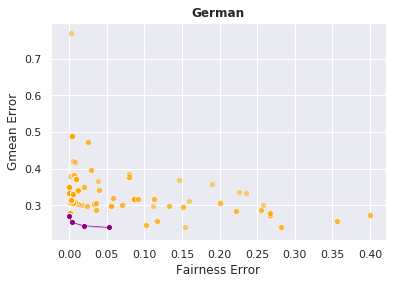

In [20]:
adult_df_last_generation = german_df.loc[german_df['generation'] == 200]
adult_df_last_generation = adult_df_last_generation.reset_index()
rows_pareto = identify_pareto(adult_df_last_generation[['error', 'dem_fp']].as_matrix())

adult_pareto_frontier = adult_df_last_generation.iloc[rows_pareto]
adult_pareto_others = adult_df_last_generation[~adult_df_last_generation.index.isin(rows_pareto)]

sns.set()
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_others, color="orange", alpha = 0.5)
ax = sns.lineplot(x="dem_fp", y="error", markers=True, data=adult_pareto_frontier, lw=0.6, color="darkmagenta")
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_frontier, color="darkmagenta")
ax.set_title('German', fontweight='bold')
ax.set_xlabel('Fairness Error')
ax.set_ylabel('Gmean Error')
ax.figure.savefig('pareto_frontier_german.pdf')

adult_pareto_frontier[['error', 'dem_fp', 'actual_depth', 'actual_leaves']].describe()

(500, 13)
(151, 13)


/home/avaldivia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


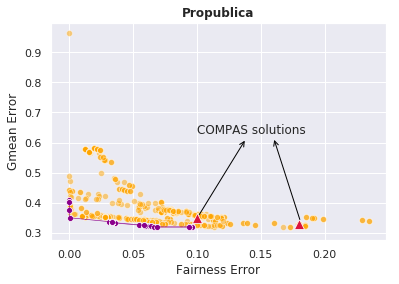

In [21]:
adult_df_last_generation = propublica_df.loc[propublica_df['generation'] == 200]
print(adult_df_last_generation.shape)
adult_df_great = adult_df_last_generation.loc[(adult_df_last_generation['error'] < 0.34925611935311285) & (adult_df_last_generation['dem_fp'] < 0.1468099179544332)]
print(adult_df_great.shape)
adult_df_last_generation = adult_df_last_generation.reset_index()
rows_pareto = identify_pareto(adult_df_last_generation[['error', 'dem_fp']].as_matrix())

adult_pareto_frontier = adult_df_last_generation.iloc[rows_pareto]
adult_pareto_others = adult_df_last_generation[~adult_df_last_generation.index.isin(rows_pareto)]

#northpointe
#northpointe_df = [[0.34925611935311285, 0.1468099179544332]] 
northpointe_df = [[0.35, 0.10], [0.33, 0.18]] 
northpointe_df = pd.DataFrame(northpointe_df, columns = ['error', 'dem_fp'])

sns.set()
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_others, color="orange", alpha = 0.5)
#ax = sns.scatterplot(x="dem_fp", y="error", data=northpointe_df, color="crimson", marker= "^", s=100)
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_frontier, color="darkmagenta")
ax = sns.lineplot(x="dem_fp", y="error", markers=True, data=adult_pareto_frontier, lw=0.6, color="darkmagenta")
ax.set_title('Propublica', fontweight='bold')
ax.set_xlabel('Fairness Error')
ax.set_ylabel('Gmean Error')
#ax.annotate('COMPAS solution', xy=(0.149, 0.37), xytext=(0.147, 0.63), arrowprops=dict(arrowstyle='<-', color = 'black'))
ax = sns.scatterplot(x="dem_fp", y="error", data=northpointe_df, color="crimson", marker= "^", s=100)
ax.annotate('', xy=(0.181, 0.338), xytext=(0.16, 0.615), arrowprops=dict(arrowstyle='<-', color = 'black'))
ax.annotate('COMPAS solutions', xy=(0.101, 0.355), xytext=(0.10, 0.63), arrowprops=dict(arrowstyle='<-', color = 'black'))
#plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])
ax.set_xlabel('Fairness Error')
ax.set_ylabel('Gmean Error')
ax.figure.savefig('pareto_frontier_propublica.pdf') 

#adult_pareto_frontier[['error', 'dem_fp', 'actual_depth', 'actual_leaves']].describe()

/home/avaldivia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,error,dem_fp,actual_depth,actual_leaves
count,98.000000,98.000000,98.000000,98.00000
mean,0.412767,0.034005,13.908163,159.44898
std,0.103282,0.057525,3.555413,75.11148
min,0.292051,0.000000,9.000000,36.00000
25%,0.336055,0.000256,13.000000,107.25000
50%,0.392434,0.000256,13.000000,170.00000
75%,0.392434,0.057639,14.000000,171.50000
max,0.599550,0.202778,20.000000,272.00000


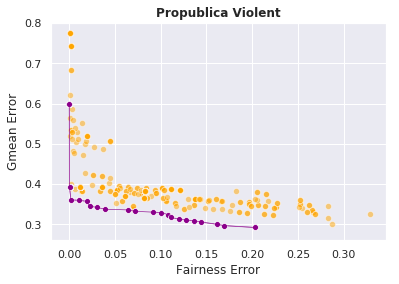

In [22]:
adult_df_last_generation = propublica_violent_df.loc[propublica_violent_df['generation'] == 200]
adult_df_last_generation = adult_df_last_generation.reset_index()
rows_pareto = identify_pareto(adult_df_last_generation[['error', 'dem_fp']].as_matrix())

adult_pareto_frontier = adult_df_last_generation.iloc[rows_pareto]
adult_pareto_others = adult_df_last_generation[~adult_df_last_generation.index.isin(rows_pareto)]

sns.set()
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_others, color="orange", alpha = 0.5)
ax = sns.lineplot(x="dem_fp", y="error", markers=True, data=adult_pareto_frontier, lw=0.6, color="darkmagenta")
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_frontier, color="darkmagenta")
ax.set_title('Propublica Violent', fontweight='bold')
ax.set_xlabel('Fairness Error')
ax.set_ylabel('Gmean Error')
ax.figure.savefig('pareto_frontier_propublica_violent.pdf')

adult_pareto_frontier[['error', 'dem_fp', 'actual_depth', 'actual_leaves']].describe()

/home/avaldivia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,error,dem_fp,actual_depth,actual_leaves
count,201.0,201.0,201.000000,201.000000
mean,0.0,0.0,3.810945,6.069652
std,0.0,0.0,0.569280,1.093217
min,0.0,0.0,3.000000,5.000000
25%,0.0,0.0,3.000000,5.000000
50%,0.0,0.0,4.000000,6.000000
75%,0.0,0.0,4.000000,7.000000
max,0.0,0.0,7.000000,8.000000


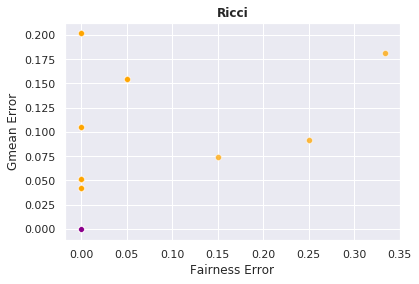

In [24]:
adult_df_last_generation = ricci_df.loc[ricci_df['generation'] == 200]
adult_df_last_generation = adult_df_last_generation.reset_index()
rows_pareto = identify_pareto(adult_df_last_generation[['error', 'dem_fp']].as_matrix())

adult_pareto_frontier = adult_df_last_generation.iloc[rows_pareto]
adult_pareto_others = adult_df_last_generation[~adult_df_last_generation.index.isin(rows_pareto)]

sns.set()
ax = sns.lineplot(x="dem_fp", y="error", markers=True, data=adult_pareto_frontier, lw=0.6, color="darkmagenta")
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_frontier, color="darkmagenta")
ax = sns.scatterplot(x="dem_fp", y="error", data=adult_pareto_others, color="orange", alpha = 0.5)
ax.set_title('Ricci', fontweight='bold')
ax.set_xlabel('Fairness Error')
ax.set_ylabel('Gmean Error')
ax.figure.savefig('pareto_frontier_ricci.pdf', bbox_inches='tight')

adult_pareto_frontier[['error', 'dem_fp', 'actual_depth', 'actual_leaves']].describe()

## Hiperparameters

In [ ]:
propublica_df = propublica_df.loc[propublica_df['generation'] == 200]
style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='max_depth', y='error', data=propublica_df, color="goldenrod")
ax1.set_xlabel('Max. Depth', fontweight='bold')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='max_depth', y='dem_fp', data=propublica_df, color="darkcyan", ax=ax2)
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('max_depth_propublica_frontier.pdf', bbox_inches='tight')

In [ ]:
style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='min_samples_split', y='error', data=propublica_df, color="goldenrod")
ax1.set_xlabel('Min. Samples Split', fontweight='bold')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='min_samples_split', y='dem_fp', data=propublica_df, color="darkcyan", ax=ax2)
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('min_samples_split_propublica_frontier.pdf', bbox_inches='tight')

In [ ]:
style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='max_leaf_nodes', y='error', data=propublica_df, color="goldenrod")
ax1.set_xlabel('Max. Leaf Nodes', fontweight='bold')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='max_leaf_nodes', y='dem_fp', data=propublica_df, color="darkcyan", ax=ax2)
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('max_leaf_nodes_propublica_frontier.pdf', bbox_inches='tight')

In [ ]:
style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='class_weight', y='error', data=propublica_df, color="goldenrod")
ax1.set_xlabel('Class Weight', fontweight='bold')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='class_weight', y='dem_fp', data=propublica_df, color="darkcyan", ax=ax2)
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('class_weight_propublica_frontier.pdf', bbox_inches='tight')

In [ ]:
style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='criterion', y='error', data=propublica_df, color="goldenrod")
ax1.set_xlabel('Criterion', fontweight='bold')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='criterion', y='dem_fp', data=propublica_df, color="darkcyan", ax=ax2)
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('criterion_propublica_frontier.pdf', bbox_inches='tight')

## Convergence


In [ ]:
propublica_df_gen_err = adult_df.groupby(['generation']).error.mean().reset_index()
propublica_df_gen_dem = adult_df.groupby(['generation']).dem_fp.mean().reset_index()

style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='generation', y='error', data=propublica_df_gen_err, color="goldenrod", err_style = "bars")
#ax1.set_title('Adult dataset', fontweight='bold', fontsize = 'larger')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')
ax1.set_title('Adults', fontweight='bold')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='generation', y='dem_fp', data=propublica_df_gen_dem, color="darkcyan", ax=ax2, err_style = "bars")
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('convergence_adults.pdf', bbox_inches='tight')

In [ ]:
propublica_df_gen_err = german_df.groupby(['generation']).error.mean().reset_index()
propublica_df_gen_dem = german_df.groupby(['generation']).dem_fp.mean().reset_index()

style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='generation', y='error', data=propublica_df_gen_err, color="goldenrod", err_style = "bars")
#ax1.set_title('German dataset', fontweight='bold', fontsize = 'larger')
ax1.set_title('German', fontweight='bold')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='generation', y='dem_fp', data=propublica_df_gen_dem, color="darkcyan", ax=ax2, err_style = "bars")
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('convergence_german.pdf', bbox_inches='tight')

In [ ]:
propublica_df_gen_err = propublica_df.groupby(['generation']).error.mean().reset_index()
propublica_df_gen_dem = propublica_df.groupby(['generation']).dem_fp.mean().reset_index()

style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='generation', y='error', data=propublica_df_gen_err, color="goldenrod", err_style = "bars")
#ax1.set_title('Propublica dataset', fontweight='bold', fontsize = 'larger')
ax1.set_title('Propublica', fontweight='bold')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='generation', y='dem_fp', data=propublica_df_gen_dem, color="darkcyan", ax=ax2, err_style = "bars")
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('convergence_propublica.pdf', bbox_inches='tight')

In [ ]:
propublica_df_gen_err = propublica_violent_df.groupby(['generation']).error.mean().reset_index()
propublica_df_gen_dem = propublica_violent_df.groupby(['generation']).dem_fp.mean().reset_index()

style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='generation', y='error', data=propublica_df_gen_err, color="goldenrod", err_style = "bars")
#ax1.set_title('Propublica Violent dataset', fontweight='bold', fontsize = 'larger')
ax1.set_title('Propublica Violent', fontweight='bold')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='generation', y='dem_fp', data=propublica_df_gen_dem, color="darkcyan", ax=ax2, err_style = "bars")
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('convergence_propublica_violent.pdf', bbox_inches='tight')

In [ ]:
propublica_df_gen_err = ricci_df.groupby(['generation']).error.mean().reset_index()
propublica_df_gen_dem = ricci_df.groupby(['generation']).dem_fp.mean().reset_index()

style.use('ggplot')
sns.set_style({'axes.grid' : False})
ax1 = sns.lineplot(x='generation', y='error', data=propublica_df_gen_err, color="goldenrod", err_style = "bars")
#ax1.set_title('Ricci dataset', fontweight='bold', fontsize = 'larger')
ax1.set_title('Ricci', fontweight='bold')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gmean Error', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

ax2 = plt.twinx()
ax2 = sns.lineplot(x='generation', y='dem_fp', data=propublica_df_gen_dem, color="darkcyan", ax=ax2, err_style = "bars")
ax2.set_ylabel('FPR Diff', color='darkcyan') 
ax2.tick_params(axis='y', labelcolor='darkcyan')

ax2.figure.savefig('convergence_ricci.pdf', bbox_inches='tight')

# Stabilty

In [ ]:
# name, mean_error, mean_dem, std_error, std_dem

adult = ['adult', 0.233023, 0.023764, 0.065754 , 0.028210]
german = ['german', 0.267138, 0.002763, 0.007817, 0.010480]
propublica  = ['propublica', 0.336370, 0.044468, 0.018207, 0.021393]
propublica_violent  = ['propublica_violent', 0.412767, 0.034005 , 0.103282, 0.057525]
ricci = ['ricci', 0.001, 0.001, 0.001, 0.001]
rectangles_df = pd.DataFrame(data = [adult, german, propublica, propublica_violent, ricci], columns=['dataset', 'mean_error', 'mean_dem', 'std_error', 'std_dem'])

In [ ]:
rectangles_df.head()

In [ ]:
n = 5


def make_error_boxes(ax, xmean, ymean, xstdv, ystdv, dataset_name, facecolor=['teal', 'crimson', 'coral', 'gold', 'magenta'],
                     edgecolor=['teal', 'crimson', 'coral', 'gold', 'magenta'], alpha=0.3):

    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for xm, ym, xs, ys in zip(xmean, ymean, xstdv, ystdv):
        rect = Rectangle((xm-xs, ym-ys), xs*2, ys*2)
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor, linewidth=4)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xmean-xstdv, ymean-ystdv, xerr=xstdv*2, yerr=ystdv*2,
                          fmt='None')

    return artists


# Create figure and axes
fig, ax = plt.subplots(1)

# Call function to create error boxes
_ = make_error_boxes(ax, rectangles_df['mean_dem'], rectangles_df['mean_error'], rectangles_df['std_dem'], rectangles_df['std_error'], rectangles_df['dataset'])


#plt.legend(handles=handles)

adult_patch = mpatches.Patch(color='teal', label='Adults', alpha = 0.3, edgecolor = 'teal', linewidth=2)
german_patch = mpatches.Patch(color='crimson', label='German', alpha = 0.3, edgecolor = 'crimson', linewidth=2)
pro_patch = mpatches.Patch(color='coral', label='Propublica', alpha = 0.3, edgecolor = 'coral', linewidth=2)
pro_vio_patch = mpatches.Patch(color='gold', label='Propublica violent', alpha = 0.3, edgecolor = 'gold', linewidth=2)
ricci_patch = mpatches.Patch(color='magenta', label='Ricci', alpha = 0.3, edgecolor = 'magenta', linewidth=2)

plt.legend(handles=[adult_patch, german_patch, pro_patch, pro_vio_patch, ricci_patch], loc = 4, bbox_to_anchor=(1.5, 0.3))

plt.title("Consistency of solutions", fontsize = 'large', fontweight='bold')
plt.xlabel("Demography FPR", fontsize = 'large')
plt.ylabel("Gmean Error", fontsize = 'large')

plt.xlim((-0.03, 0.13))
plt.ylim((-0.01, 0.8))
plt.show()


In [ ]:
rectangles_df.head()